In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import datetime

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import dataset
housing_df_1 = pd.read_csv('train.csv')
print(housing_df_1.shape)

(1460, 81)


In [3]:
housing_df_1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
housing_df_1.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
# Handling missing data entries
hdf_missing_percent_1 = (housing_df_1.isnull().sum() / housing_df_1.isnull().count()*100).sort_values(ascending = False)
hdf_missing_percent_1.head(20)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
Id               0.000000
dtype: float64

In [6]:
# Dropping the columns with >40% missing entries and id column
housing_df_2 = housing_df_1.drop(['Id','PoolQC', 'MiscFeature','Alley','Fence','FireplaceQu' ], axis = 1)

# Check other columns with numeral values
housing_df_2[['LotFrontage','GarageYrBlt','MasVnrArea']].describe()

,LotFrontage,GarageYrBlt,MasVnrArea
count,1201.000000,1379.000000,1452.000000
mean,70.049958,1978.506164,103.685262
std,24.284752,24.689725,181.066207
min,21.000000,1900.000000,0.000000
25%,59.000000,1961.000000,0.000000
50%,69.000000,1980.000000,0.000000
75%,80.000000,2002.000000,166.000000
max,313.000000,2010.000000,1600.000000


In [7]:
# Handling missing values basis mean and median

housing_df_2['LotFrontage']= housing_df_2.LotFrontage.fillna(housing_df_2.LotFrontage.median()) 
housing_df_2['GarageYrBlt']= housing_df_2.GarageYrBlt.fillna(housing_df_2.GarageYrBlt.mean())  
housing_df_2['MasVnrArea']= housing_df_2.MasVnrArea.fillna(housing_df_2.MasVnrArea.median())   
housing_df_2.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<Axes: xlabel='MasVnrArea', ylabel='Density'>

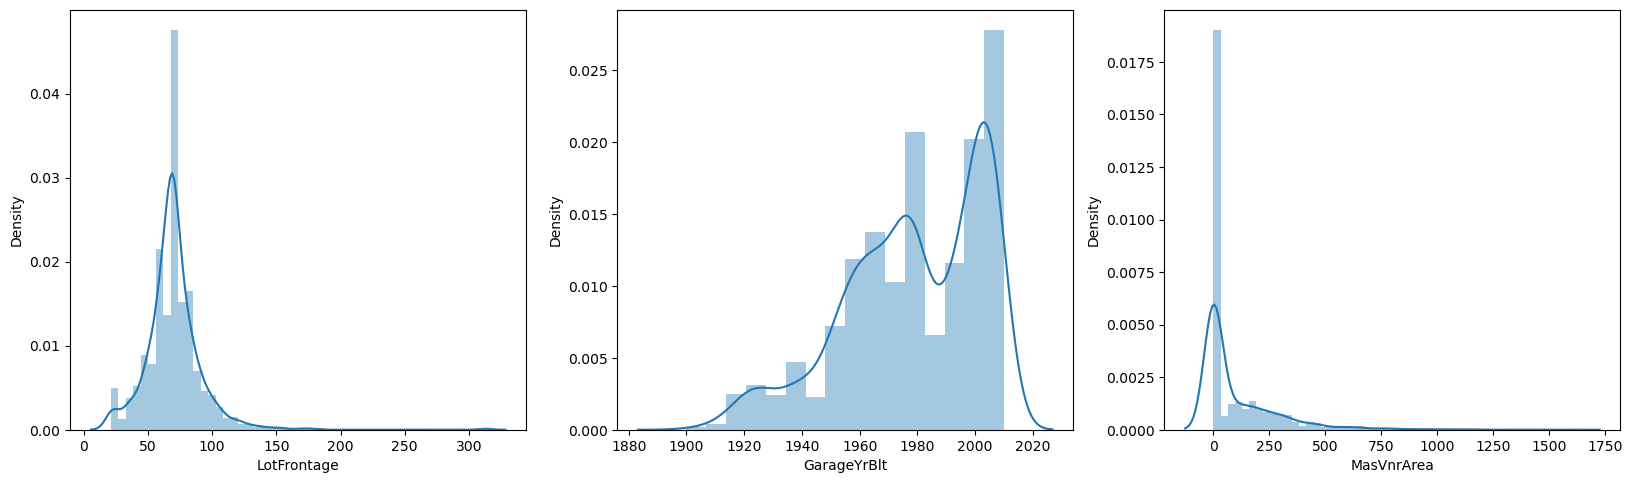

In [8]:
# Data visualization after replacing missing values
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.distplot(housing_df_2['LotFrontage'])
plt.subplot(2,3,2)
sns.distplot(housing_df_2['GarageYrBlt'])
plt.subplot(2,3,3)
sns.distplot(housing_df_2['MasVnrArea'])

In [9]:
# Basis houses with no garage, the columns - 'GarageType', 'GarageCond', GarageFinish', 'GarageQual' replaced by 'No Garage'
for col in ['GarageType', 'GarageQual', 'GarageCond', 'GarageFinish']:
    housing_df_2[col].fillna('No Garage', inplace=True)

# Basis houses with no basement, 'BsmtQual', 'BsmtExposure','BsmtFinType1','BsmtFinType2', 'BsmtCond' replaced by 'No Basement'
for col in ['BsmtQual','BsmtExposure','BsmtQual', 'BsmtFinType1', 'BsmtFinType2', 'BsmtCond']:
    housing_df_2[col].fillna('No Basement', inplace=True)
    
housing_df_2['GarageYrBlt'].fillna(0, inplace=True)

In [10]:
# Re checking missing data entries
hdf_missing_percent_2 = (housing_df_2.isnull().sum() / housing_df_2.isnull().count()*100).sort_values(ascending = False)
hdf_missing_percent_2.head(20)

MasVnrType      0.547945
Electrical      0.068493
MSSubClass      0.000000
HalfBath        0.000000
Fireplaces      0.000000
Functional      0.000000
TotRmsAbvGrd    0.000000
KitchenQual     0.000000
KitchenAbvGr    0.000000
BedroomAbvGr    0.000000
FullBath        0.000000
HeatingQC       0.000000
BsmtHalfBath    0.000000
BsmtFullBath    0.000000
GrLivArea       0.000000
LowQualFinSF    0.000000
2ndFlrSF        0.000000
1stFlrSF        0.000000
GarageType      0.000000
GarageYrBlt     0.000000
dtype: float64

In [11]:
# Using the most frequent entry for the remaining 2 columns
housing_df_2['MasVnrType'] = housing_df_2['MasVnrType'].replace(np.nan, 'None') 
housing_df_2['Electrical'] = housing_df_2['Electrical'].replace(np.nan, 'SBrkr')

housing_df_2.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [12]:
# Handling non numerical variables
non_num_col = []
num_col = []

for col in list(housing_df_2):
    if housing_df_2[col].dtypes == 'object':
        non_num_col.append(col)  
    else:
        num_col.append(col)
print('Categorical variables:\n',non_num_col)

print('Numerical variables:\n', num_col)

Categorical variables:
 ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
Numerical variables:
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3

In [13]:
housing_df_dummy_2 = pd.get_dummies(housing_df_2[non_num_col], drop_first=True)
housing_df_dummy_2.describe()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.044521,0.010959,0.788356,0.149315,0.995890,0.028082,0.006849,0.633562,0.034247,0.024658,...,0.003425,0.003425,0.083562,0.002055,0.867808,0.002740,0.008219,0.013699,0.820548,0.085616
std,0.206319,0.104145,0.408614,0.356521,0.063996,0.165264,0.082505,0.481996,0.181924,0.155132,...,0.058440,0.058440,0.276824,0.045299,0.338815,0.052289,0.090317,0.116277,0.383862,0.279893
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
# Concatenating
housing_df_concat_2 = pd.concat([housing_df_2, housing_df_dummy_2], axis=1)
housing_df_concat_2.shape

(1460, 280)

In [15]:
# Dropping the original columns
housing_df_3 = housing_df_concat_2.drop(non_num_col, axis = 1)
housing_df_3.shape

(1460, 242)

### Distribution of dependent variable

<Axes: xlabel='SalePrice', ylabel='Density'>

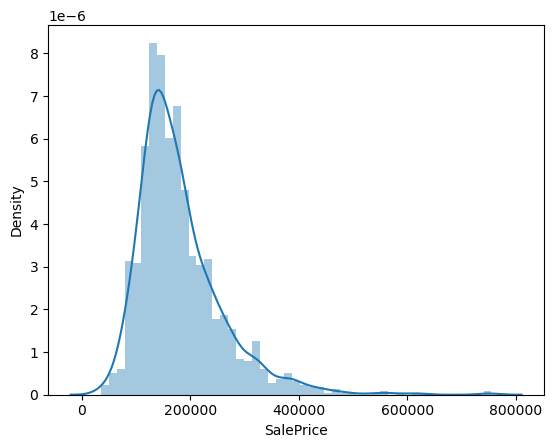

In [16]:
sns.distplot(housing_df_3['SalePrice']) 

In [17]:
print("Skewness: %f" % housing_df_3['SalePrice'].skew())

Skewness: 1.882876


### Data transformation

<Axes: xlabel='SalePrice', ylabel='Density'>

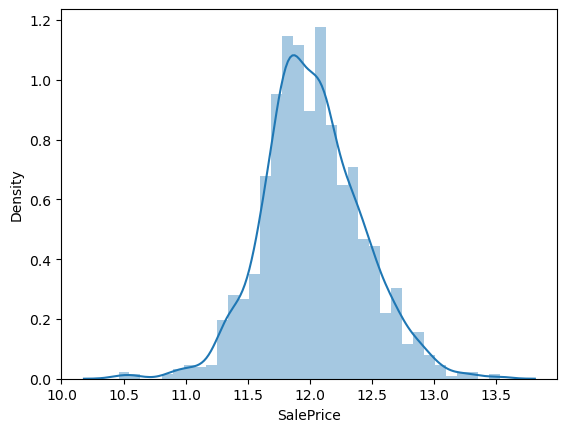

In [18]:
# Checking data transformation
housing_df_4 = housing_df_3 # preserving the earlier dataframe without transformation
housing_df_4['SalePrice']=np.log(housing_df_4.SalePrice)
sns.distplot(housing_df_4['SalePrice']) 

In [19]:
print("Skewness: %f" % housing_df_4['SalePrice'].skew())

Skewness: 0.121335


### Test train data

In [20]:
X = housing_df_4.drop('SalePrice', axis=1)
y = housing_df_4['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Scaling

In [21]:
scaler = StandardScaler()
num_col_sc = num_col
num_col_sc.remove('SalePrice')
X_train[num_col_sc] = scaler.fit_transform(X_train[num_col_sc])
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,-0.657071,-0.115302,-0.473765,-0.779861,0.383154,-1.524903,-1.694350,-0.558025,0.043512,-0.293313,...,0,0,0,0,1,0,0,0,1,0
318,0.035976,0.926898,-0.056845,0.649651,-0.533005,0.717033,0.390956,0.809137,1.160345,-0.293313,...,0,0,0,0,1,0,0,0,1,0
239,-0.195040,-0.794998,-0.169324,-0.065105,-1.449164,-0.865510,-1.694350,-0.558025,-0.761296,-0.293313,...,0,0,0,0,1,0,0,0,1,0
986,-0.195040,-0.477806,-0.502297,-0.065105,2.215472,-2.019448,0.875911,-0.558025,-0.963574,-0.293313,...,0,0,0,0,1,0,0,0,1,0
1416,3.039179,-0.432493,0.082905,-1.494617,0.383154,-2.843689,-1.694350,-0.558025,-0.963574,-0.293313,...,0,0,0,0,1,0,0,0,1,0


In [22]:
X_test[num_col_sc] = scaler.transform(X_test[num_col_sc])
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1436,-0.888086,-0.432493,-0.144189,-1.494617,0.383154,-0.008299,-0.675945,-0.558025,0.361992,-0.293313,...,0,0,0,0,1,0,0,0,1,0
57,0.035976,0.881585,0.112505,0.649651,-0.533005,1.079700,0.924407,-0.558025,-0.963574,-0.293313,...,0,0,0,0,1,0,0,0,1,0
780,-0.888086,-0.296554,-0.253368,0.649651,-0.533005,0.782973,0.536443,-0.355087,-0.963574,-0.293313,...,0,0,0,0,1,0,0,0,1,0
382,0.035976,0.428455,-0.120412,0.649651,-0.533005,1.145639,1.021398,-0.558025,-0.963574,-0.293313,...,0,0,0,0,1,0,0,0,1,0
1170,0.498007,0.292515,-0.058786,-0.065105,0.383154,0.189519,-0.384972,-0.558025,0.159714,-0.293313,...,0,0,0,0,1,0,0,0,1,0


### Ridge regression

In [23]:
# Tuning parameters
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.4, 0.5,1.0, 2.0, 5.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

folds = 5
model_crva = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_crva.fit(X_train, y_train)

Fitting 5 folds for each of 17 candidates, totalling 85 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.4,
                                   0.5, 1.0, 2.0, 5.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [24]:
crva_result = pd.DataFrame(model_crva.cv_results_)
crva_result = crva_result[crva_result['param_alpha']<=200]
crva_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.017406,0.014356,0.005644,0.001991,0.0001,{'alpha': 0.0001},0.890012,0.654556,0.806205,0.576263,...,0.769761,0.133871,17,0.964082,0.962456,0.961323,0.960216,0.959408,0.961497,0.001651
1,0.009930,0.000424,0.003902,0.000299,0.001,{'alpha': 0.001},0.890018,0.654693,0.807143,0.589315,...,0.772671,0.130270,16,0.964069,0.962456,0.961311,0.960207,0.959394,0.961487,0.001653
2,0.010190,0.000618,0.003715,0.000344,0.01,{'alpha': 0.01},0.888601,0.656017,0.813330,0.686398,...,0.793598,0.106534,15,0.963213,0.962443,0.960559,0.959585,0.958464,0.960853,0.001761
3,0.009634,0.000298,0.004054,0.000500,0.05,{'alpha': 0.05},0.879410,0.661173,0.819849,0.833461,...,0.822354,0.087737,14,0.957726,0.962234,0.955650,0.954688,0.952373,0.956534,0.003329
4,0.009613,0.000389,0.003762,0.000204,0.1,{'alpha': 0.1},0.874056,0.666612,0.821369,0.873357,...,0.829659,0.086560,12,0.953640,0.961834,0.951980,0.950393,0.947786,0.953127,0.004762


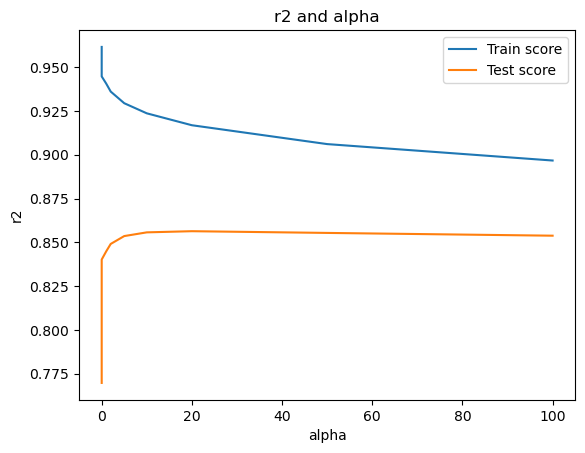

In [25]:
# Plot score and tuning parameter 
crva_result['param_alpha'] = crva_result['param_alpha'].astype('int32')

plt.plot(crva_result['param_alpha'], crva_result['mean_train_score'])
plt.plot(crva_result['param_alpha'], crva_result['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')
plt.title("r2 and alpha")
plt.legend(['Train score', 'Test score'])
plt.show()

In [26]:
ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)


Ridge(alpha=10)

In [27]:
for i,col in enumerate(X_train.columns):   
    print ("Ridge model coefficients for {} is {}:".format(col,ridge.coef_[i]))

Ridge model coefficients for MSSubClass is -0.023001136604705125:
Ridge model coefficients for LotFrontage is -0.009380404131769897:
Ridge model coefficients for LotArea is 0.01679716756227755:
Ridge model coefficients for OverallQual is 0.08133023399714352:
Ridge model coefficients for OverallCond is 0.039570898660875854:
Ridge model coefficients for YearBuilt is 0.03712079005760221:
Ridge model coefficients for YearRemodAdd is 0.023009713356126907:
Ridge model coefficients for MasVnrArea is -0.001520672964662419:
Ridge model coefficients for BsmtFinSF1 is -0.0027081190122172044:
Ridge model coefficients for BsmtFinSF2 is 0.007613255302620891:
Ridge model coefficients for BsmtUnfSF is 0.005599031352149645:
Ridge model coefficients for TotalBsmtSF is 0.005561961848868282:
Ridge model coefficients for 1stFlrSF is 0.036295556311115106:
Ridge model coefficients for 2ndFlrSF is 0.04332545358458484:
Ridge model coefficients for LowQualFinSF is 0.0018761986127526153:
Ridge model coefficients

### Lasso regression

In [28]:
# Tuning parameters
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.4, 0.5,1.0, 2.0, 5.0, 10.0, 20, 50, 100, 500, 1000 ]}


lasso = Lasso()

folds = 5
model_crva = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_crva.fit(X_train, y_train)

Fitting 5 folds for each of 17 candidates, totalling 85 fits


GridSearchCV(cv=5, estimator=Ridge(alpha=10),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.4,
                                   0.5, 1.0, 2.0, 5.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [29]:
crva_result = pd.DataFrame(model_crva.cv_results_)
crva_result = crva_result[crva_result['param_alpha']<=200]
crva_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.015598,0.002052,0.005826,0.001250,0.0001,{'alpha': 0.0001},0.890012,0.654556,0.806205,0.576263,...,0.769761,0.133871,17,0.964082,0.962456,0.961323,0.960216,0.959408,0.961497,0.001651
1,0.011643,0.002081,0.004431,0.001861,0.001,{'alpha': 0.001},0.890018,0.654693,0.807143,0.589315,...,0.772671,0.130270,16,0.964069,0.962456,0.961311,0.960207,0.959394,0.961487,0.001653
2,0.009540,0.000358,0.003936,0.000686,0.01,{'alpha': 0.01},0.888601,0.656017,0.813330,0.686398,...,0.793598,0.106534,15,0.963213,0.962443,0.960559,0.959585,0.958464,0.960853,0.001761
3,0.009430,0.000068,0.003494,0.000046,0.05,{'alpha': 0.05},0.879410,0.661173,0.819849,0.833461,...,0.822354,0.087737,14,0.957726,0.962234,0.955650,0.954688,0.952373,0.956534,0.003329
4,0.009832,0.000541,0.004064,0.000922,0.1,{'alpha': 0.1},0.874056,0.666612,0.821369,0.873357,...,0.829659,0.086560,12,0.953640,0.961834,0.951980,0.950393,0.947786,0.953127,0.004762


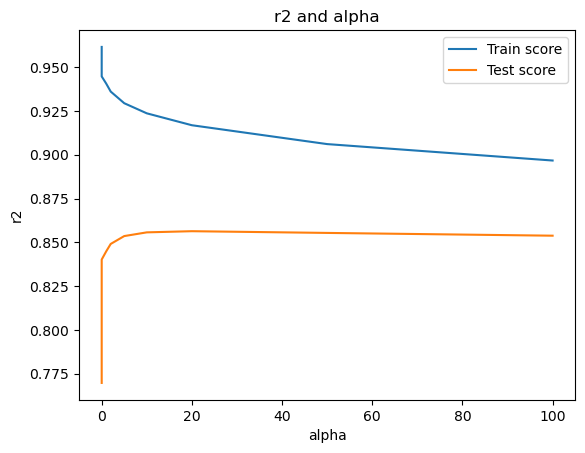

In [30]:
# Plot score and tuning parameter 
crva_result['param_alpha'] = crva_result['param_alpha'].astype('int32')

plt.plot(crva_result['param_alpha'], crva_result['mean_train_score'])
plt.plot(crva_result['param_alpha'], crva_result['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')
plt.title("r2 and alpha")
plt.legend(['Train score', 'Test score'])
plt.show()

In [31]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)


Lasso(alpha=0.001)

In [32]:
lasso.coef_

array([-0.02017061, -0.00665944,  0.01529326,  0.09156182,  0.04425711,
        0.05136165,  0.02215245,  0.        , -0.        ,  0.00259711,
        0.00573009,  0.01305923,  0.        ,  0.        , -0.00092138,
        0.11444231,  0.03382005,  0.00369758,  0.01601889,  0.00997749,
        0.00759264, -0.0104963 ,  0.01426034,  0.01967852, -0.        ,
        0.04649262,  0.00140096,  0.01344107, -0.00022987,  0.00804741,
        0.006364  ,  0.01157272, -0.01881674, -0.00118178, -0.00128578,
       -0.00754778,  0.00251553,  0.        ,  0.05708785, -0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.0025757 ,  0.0075142 , -0.        ,  0.02975718, -0.        ,
       -0.        , -0.        ,  0.00083979, -0.        , -0.        ,
       -0.        ,  0.00338629,  0.04266864, -0.        ,  0.10952844,
       -0.0649805 , -0.        , -0.04432459, -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.03522135,  0.09

In [33]:
for i,col in enumerate(X_train.columns):   
    print ("Lasso model coefficients for {} is {}:".format(col,lasso.coef_[i]))

Lasso model coefficients for MSSubClass is -0.020170612612188124:
Lasso model coefficients for LotFrontage is -0.0066594367891242515:
Lasso model coefficients for LotArea is 0.015293257998586688:
Lasso model coefficients for OverallQual is 0.09156181501286116:
Lasso model coefficients for OverallCond is 0.04425710662924311:
Lasso model coefficients for YearBuilt is 0.051361646739155574:
Lasso model coefficients for YearRemodAdd is 0.022152451948419093:
Lasso model coefficients for MasVnrArea is 0.0:
Lasso model coefficients for BsmtFinSF1 is -0.0:
Lasso model coefficients for BsmtFinSF2 is 0.002597111075103067:
Lasso model coefficients for BsmtUnfSF is 0.0057300917845422026:
Lasso model coefficients for TotalBsmtSF is 0.013059226938313248:
Lasso model coefficients for 1stFlrSF is 0.0:
Lasso model coefficients for 2ndFlrSF is 0.0:
Lasso model coefficients for LowQualFinSF is -0.0009213815645796388:
Lasso model coefficients for GrLivArea is 0.11444230587483435:
Lasso model coefficients f

### Comparing the scores for both

In [34]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.9194908596547796
0.8889231785536663


In [35]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.9055857787486548
0.8834961045761469


### Model coefficients

In [36]:
# Ridge model coefficients
ridge_coef = list(ridge.coef_)
ridge_coef.insert(0, ridge.intercept_)
ridge_coef = [round(x, 3) for x in ridge_coef]
col_r = X.columns
col_r = col_r.insert(0, "constant")
list(sorted(zip(ridge_coef,col_r), reverse = True))

[(11.656, 'constant'),
 (0.101, 'Neighborhood_Crawfor'),
 (0.087, 'Neighborhood_NridgHt'),
 (0.081, 'OverallQual'),
 (0.073, 'Neighborhood_Somerst'),
 (0.065, 'MSZoning_RL'),
 (0.063, 'GrLivArea'),
 (0.059, 'SaleType_ConLD'),
 (0.059, 'Neighborhood_StoneBr'),
 (0.058, 'Condition1_Norm'),
 (0.056, 'Exterior1st_BrkFace'),
 (0.052, 'MSZoning_FV'),
 (0.051, 'Neighborhood_ClearCr'),
 (0.05, 'SaleCondition_Normal'),
 (0.049, 'CentralAir_Y'),
 (0.047, 'RoofMatl_WdShngl'),
 (0.047, 'Neighborhood_NoRidge'),
 (0.047, 'BsmtExposure_Gd'),
 (0.043, 'LandContour_Lvl'),
 (0.043, 'GarageCars'),
 (0.043, '2ndFlrSF'),
 (0.04, 'OverallCond'),
 (0.04, 'MSZoning_RH'),
 (0.04, 'LandContour_Low'),
 (0.04, 'Functional_Typ'),
 (0.04, 'Condition2_Norm'),
 (0.038, 'RoofMatl_CompShg'),
 (0.038, 'PavedDrive_P'),
 (0.037, 'YearBuilt'),
 (0.037, 'Foundation_PConc'),
 (0.036, 'LandContour_HLS'),
 (0.036, 'GarageQual_Gd'),
 (0.036, '1stFlrSF'),
 (0.035, 'Heating_GasW'),
 (0.034, 'LotConfig_CulDSac'),
 (0.033, 'SaleTyp

In [37]:
# Lasso model coefficients
lasso_coef = list(lasso.coef_)
lasso_coef.insert(0, lasso.intercept_)
lasso_coef = [round(x, 3) for x in lasso_coef]
col_l = X.columns
col_l = col_l.insert(0, "constant")
list(sorted(zip(lasso_coef,col_l),reverse = True))

[(11.797, 'constant'),
 (0.114, 'GrLivArea'),
 (0.11, 'Neighborhood_Crawfor'),
 (0.105, 'Neighborhood_Somerst'),
 (0.093, 'Neighborhood_NridgHt'),
 (0.092, 'OverallQual'),
 (0.058, 'Condition1_Norm'),
 (0.057, 'MSZoning_RL'),
 (0.057, 'Exterior1st_BrkFace'),
 (0.052, 'BsmtExposure_Gd'),
 (0.051, 'YearBuilt'),
 (0.046, 'GarageCars'),
 (0.044, 'OverallCond'),
 (0.043, 'Neighborhood_ClearCr'),
 (0.038, 'CentralAir_Y'),
 (0.035, 'SaleType_New'),
 (0.035, 'Neighborhood_NoRidge'),
 (0.034, 'BsmtFullBath'),
 (0.031, 'SaleCondition_Normal'),
 (0.03, 'LotConfig_CulDSac'),
 (0.025, 'Neighborhood_StoneBr'),
 (0.025, 'Functional_Typ'),
 (0.022, 'YearRemodAdd'),
 (0.022, 'GarageType_Attchd'),
 (0.021, 'Foundation_PConc'),
 (0.02, 'Fireplaces'),
 (0.017, 'Exterior2nd_MetalSd'),
 (0.016, 'FullBath'),
 (0.015, 'LotArea'),
 (0.015, 'Exterior2nd_VinylSd'),
 (0.015, 'ExterQual_Gd'),
 (0.015, 'BsmtFinType2_Unf'),
 (0.014, 'TotRmsAbvGrd'),
 (0.014, 'BsmtCond_TA'),
 (0.013, 'WoodDeckSF'),
 (0.013, 'TotalBsm

### Ridge regression 
#### Key drivers
(0.101, 'Neighborhood_Crawfor'),
 (0.087, 'Neighborhood_NridgHt'),
 (0.081, 'OverallQual'),
 (0.073, 'Neighborhood_Somerst'),
 (0.065, 'MSZoning_RL'),

### Lasso regression
#### Key drivers
(0.114, 'GrLivArea'),
 (0.11, 'Neighborhood_Crawfor'),
 (0.105, 'Neighborhood_Somerst'),
 (0.093, 'Neighborhood_NridgHt'),
 (0.092, 'OverallQual'),